In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPool2D
from keras.optimizers import Adam
from keras import regularizers


Using TensorFlow backend.


In [2]:
from face_rec import Face_Embedding
from face_rec import Image_Preprocessing

# filter 적용해서 이미지 증폭

## thresh : 6개의 필터사용
- THRESH_BINARY : /2
- THRESH_TRUNC : /2, /3
- THRESH_TOZERO : /3, /4, /5

In [271]:
def convert_color(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [151]:
img_path = img_dict[0][0]
img = cv2.imread(img_path)
img = convert_color(img)

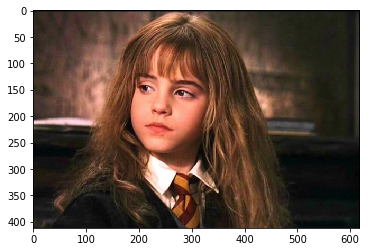

In [168]:
plt.imshow(convert_color(cv2.imread(img_path)))

In [226]:
_, thresh_1 = cv2.threshold(img, 255/2, 255, cv2.THRESH_BINARY) # 2
_, thresh_2 = cv2.threshold(img, 255/2, 255, cv2.THRESH_TRUNC) # 2,3
_, thresh_3 = cv2.threshold(img, 255/5, 255, cv2.THRESH_TOZERO) # 3,4,5

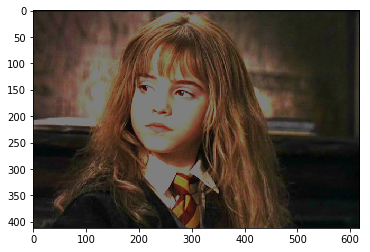

In [227]:
plt.imshow(thresh_2)

# blur : 5개의 필터 사용
- 3, 5, 7, 9, 12

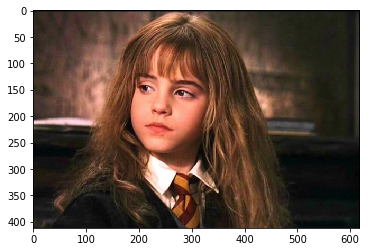

In [230]:
plt.imshow(convert_color(cv2.imread(img_path)))

In [229]:
blur_3 = cv2.filter2D(img, -1, np.ones((3, 3))/3**2)
blur_5 = cv2.filter2D(img, -1, np.ones((5, 5))/5**2)
blur_7 = cv2.filter2D(img, -1, np.ones((7, 7))/7**2)
blur_9 = cv2.filter2D(img, -1, np.ones((9, 9))/9**2)
blur_12 = cv2.filter2D(img, -1, np.ones((12, 12))/12**2)

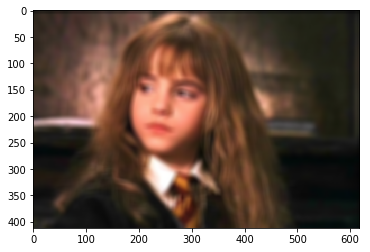

In [235]:
plt.imshow(blur_12)

## noise : 4개 필터 사용
- 0.05, 0.1, 0.15, 0.2

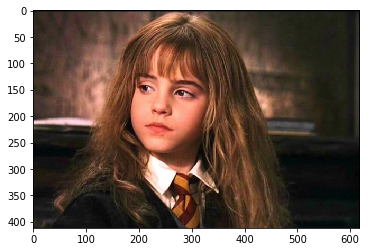

In [236]:
plt.imshow(convert_color(cv2.imread(img_path)))

In [248]:
noise = np.clip((img/255 + np.random.normal(scale=0.2, size=img.shape)) * 255, 0, 255).astype('uint8')

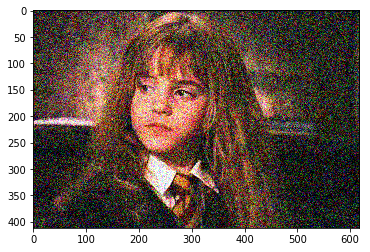

In [249]:
plt.imshow(noise)

In [ ]:
# # thresh section
# _, thresh_1 = cv2.threshold(full_img, 255/2, 255, cv2.THRESH_BINARY)
# _, thresh_2 = cv2.threshold(full_img, 255/2, 255, cv2.THRESH_TRUNC)
# _, thresh_3 = cv2.threshold(full_img, 255/2, 255, cv2.THRESH_TOZERO)

# cv2.imwrite(box_path + "/training_img/_f1" + f_ext, thresh_1)
# cv2.imwrite(box_path + "/training_img/_f2" + f_ext, thresh_2)
# cv2.imwrite(box_path + "/training_img/_f3" + f_ext, thresh_3)

# # blur section
# blur_3 = cv2.filter2D(full_img, -1, np.ones((3, 3))/3**2)
# blur_5 = cv2.filter2D(full_img, -1, np.ones((5, 5))/5**2)
# blur_7 = cv2.filter2D(full_img, -1, np.ones((7, 7))/7**2)
# blur_9 = cv2.filter2D(full_img, -1, np.ones((9, 9))/9**2)
# blur_12 = cv2.filter2D(full_img, -1, np.ones((12, 12))/12**2)
# cv2.imre
# cv2.imwrite(box_path + "/training_img/_b" + f_ext, blur_10)
# cv2.imwrite(box_path + "/training_img/_f5" + f_ext, blur_15)
# cv2.imwrite(box_path + "/training_img/_f6" + f_ext, blur_20)

# # noise, guassian, bilat
# noise = np.clip((full_img/255 + np.random.normal(scale=0.2, size=full_img.shape)) * 255, 0, 255).astype('uint8')
# gauss = cv2.GaussianBlur(noise, (9, 9), 2)
# bilat= cv2.bilateralFilter(noise, 9, 75, 75)
# cv2.imwrite(box_path + "/training_img/_f7" + f_ext, noise)
# cv2.imwrite(box_path + "/training_img/_f8" + f_ext, gauss)
# cv2.imwrite(box_path + "/training_img/_f8" + f_ext, bilat)

# [thresh:6,  blur:5, noise:4 ] combination
- 총 210개의 이미지 만들어지게

In [301]:
from itertools import combinations
combi_list = ['thresh', 'blur', 'noise']

for d in combinations(combi_list, 3):
    print('3C3')
    print(d)

for d in combinations(combi_list, 2):
    print('3C2')
    print(d)
for d in combinations(combi_list, 1):
    print('3C1')
    


3C3
('thresh', 'blur', 'noise')
3C2
('thresh', 'blur')
3C2
('thresh', 'noise')
3C2
('blur', 'noise')
3C1
3C1
3C1


# 각 필터 적용해서 이미지 증폭
- eval 통해서 함수 이름으로 함수실행

In [453]:
def tb2(img):
    return cv2.threshold(img, 255/2, 255, cv2.THRESH_BINARY)
    
def tt2(img):
    return cv2.threshold(img, 255/2, 255, cv2.THRESH_TRUNC) 

def tt3(img):
    return cv2.threshold(img, 255/3, 255, cv2.THRESH_TRUNC) 
    
def tz3(img):
    return cv2.threshold(img, 255/3, 255, cv2.THRESH_TOZERO)

def tz4(img):
    return cv2.threshold(img, 255/4, 255, cv2.THRESH_TOZERO)

def tz5(img):
    return cv2.threshold(img, 255/5, 255, cv2.THRESH_TOZERO)

# 3, 5, 7, 9, 12
def b3(img): 
    return cv2.filter2D(img, -1, np.ones((3, 3))/3**2)
def b5(img): 
    return cv2.filter2D(img, -1, np.ones((5, 5))/5**2)
def b7(img): 
    return cv2.filter2D(img, -1, np.ones((7, 7))/7**2)
def b9(img): 
    return cv2.filter2D(img, -1, np.ones((9, 9))/9**2)
def b12(img): 
    return cv2.filter2D(img, -1, np.ones((12, 12))/12**2)

# 0.05, 0.1, 0.15, 0.2
def n05(img):
    return np.clip((img/255 + np.random.normal(scale=0.05, size=img.shape)) * 255, 0, 255).astype('uint8')
def n10(img):
    return np.clip((img/255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype('uint8')
def n15(img):
    return np.clip((img/255 + np.random.normal(scale=0.15, size=img.shape)) * 255, 0, 255).astype('uint8')
def n20(img):
    return np.clip((img/255 + np.random.normal(scale=0.2, size=img.shape)) * 255, 0, 255).astype('uint8')

In [436]:
thresh_list = ['tb2','tt2','tt3','tz3','tz4','tz5']
blur_list = ['b3','b5','b7','b9','b12']
noise_list = ['n05','n10','n15','n20']

In [308]:
import os
import cv2
import matplotlib.pyplot as plt
from itertools import combinations

## filter 조합을 유동적으로 계속 바꿈

### 여기선 thresh :5 blur :2 noise :3

In [539]:
%%time
filter_list = ['thresh','blur', 'noise']

thresh_list = ['tb2','tt2','tz3','tz4','tz5']
blur_list = ['b3','b5']
noise_list = ['n05','n10','n15']

folder_dir = './training_images/'
# 각 class 폴더 명
face_class = os.listdir(folder_dir)

for label, class_ in enumerate(face_class):
    class_dir = os.path.join(folder_dir, class_)
    write_path = class_dir + '/' + os.path.split(class_dir)[-1] + '_extend/'
    for img in os.listdir(class_dir):
        if '.jpg' in img or '.png' in img:
            # 각 이미지의 경로에 접근 함 이제 여기서 증폭시키면 됨
            ori_path = os.path.join(class_dir, img)
            # 각 이미지에 대한 filter combination의 모든 경우의수로 이미지를 만들고 저장
            # 1~3 의 조합의 수에 대한 filter 적용
            file_name = os.path.split(ori_path)[-1].split('.')[0]
            ori_img = ip.face_preprocessing(ori_path, True)[0]
            cv2.imwrite(write_path+file_name+'.jpg', ori_img)
            for combi_list in combinations(filter_list,1):
                #ori_img = cv2.imread(ori_path)
                for c in combi_list:
                    if c is 'thresh':
                        for t in thresh_list:
                            path = write_path+file_name+'_' + t + '.jpg'
                            cv2.imwrite(path, eval(t)(ori_img)[1])
                    elif c is 'blur':
                        for b in blur_list:
                            path = write_path+file_name+'_' + b + '.jpg'
                            cv2.imwrite(path, eval(b)(ori_img))
                    else:
                        for n in noise_list:
                            path = write_path+file_name+'_' + n + '.jpg'
                            cv2.imwrite(path, eval(n)(ori_img))
            # 2 combination
            # [t, b] , [t, n], [b, n]
            for t in thresh_list:
                path = write_path+file_name + '_' + t
                img_ = eval(t)(ori_img)[1]
                for b in blur_list:
                    cv2.imwrite(path+ '_' + b + '.jpg', eval(b)(img_))
            for t in thresh_list:
                path = write_path+file_name + '_' + t
                img_ = eval(t)(ori_img)[1]
                for n in noise_list:
                    cv2.imwrite(path+ '_' + n + '.jpg', eval(n)(img_))
            for b in blur_list:
                path = write_path+file_name + '_' + b
                img_ = eval(b)(ori_img)
                for n in noise_list:
                    cv2.imwrite(path+ '_' + n + '.jpg', eval(n)(img_))
            # 3 combination
            for t in thresh_list:
                path = write_path+file_name + '_' + t
                img_ = eval(t)(ori_img)[1]
                for b in blur_list:
                    file_name2 = '_' + b
                    img__ = eval(b)(img_)
                    for n in noise_list:
                        path = write_path+file_name + '_' + t + file_name2
                        cv2.imwrite(path+ '_' + n + '.jpg', eval(n)(img__))

# 각 image에 상위폴더를 dictionary의 label에 저장

In [3]:
import os

In [4]:
%%time
folder_dir = './training_images/'
# 각 class 폴더 명
face_class = os.listdir(folder_dir)
class_dict = {}
for label, class_ in enumerate(face_class):
    class_dir = os.path.join(folder_dir, class_)
    write_path = class_dir + '/' + os.path.split(class_dir)[-1] + '_extend/'
    class_dict[label] = write_path

Wall time: 10 ms


In [5]:
class_dict[0]

'./training_images/emma_10/emma_10_extend/'

In [6]:
class_dict

{0: './training_images/emma_10/emma_10_extend/',
 1: './training_images/finn_10/finn_10_extend/',
 2: './training_images/harry_10/harry_10_extend/',
 3: './training_images/hyangi_10/hyangi_10_extend/',
 4: './training_images/jaden_10/jaden_10_extend/',
 5: './training_images/matilda_10/matilda_10_extend/'}

# image to embedding_csv

In [7]:
import face_recognition
import pandas as pd
from keras.utils import to_categorical
import numpy as np
import cv2

- one hot encoding : https://jovianlin.io/keras-one-hot-encode-decode-sequence-data/
- ? : https://stackoverflow.com/questions/49604765/create-model-using-one-hot-encoding-in-keras

In [29]:
# embedding 값들을 뽑아서 dict형태로 만듬
class_embedding = {}
for k in class_dict.keys():
    embedding_list = []
    for img_path in os.listdir(class_dict[k]):
        if '.jpg' in img_path or '.png' in img_path:
            img = cv2.imread(os.path.join(class_dict[k], img_path))
            img_size = [(0, img.shape[1], img.shape[0], 0)]
            embedding_list.append(face_recognition.face_encodings(img, img_size)[0])
    class_embedding[k] = embedding_list

# dataframe으로 만듬
class_df = pd.DataFrame(columns=range(0,128))
class_df['label'] = None

for label in class_embedding.keys():
    df = pd.DataFrame(class_embedding[0])
    df['label'] = label
    class_df = class_df.append(df)

In [88]:
class_df = class_df.reset_index().iloc[:,1:]

In [90]:
class_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,-0.116966,0.105722,0.071101,-0.122388,-0.097630,-0.046728,0.030565,-0.047742,0.218724,-0.160647,...,0.071585,-0.105559,-0.139782,-0.181308,-0.095971,0.080734,0.016587,0.062267,0.032891,0
1,-0.143698,0.094247,0.008616,-0.134260,-0.110266,-0.033254,0.002269,-0.085317,0.212632,-0.216360,...,0.065821,0.041428,-0.119974,-0.106745,-0.091908,0.084793,0.036036,0.043039,0.027995,0
2,-0.147883,0.094811,0.009422,-0.130360,-0.107571,-0.035115,0.001303,-0.087483,0.207203,-0.215515,...,0.064963,0.046984,-0.119764,-0.106751,-0.093263,0.079152,0.033368,0.041784,0.028809,0
3,-0.155621,0.096069,0.010477,-0.134784,-0.101957,-0.035471,0.007911,-0.084595,0.202324,-0.219831,...,0.058431,0.051998,-0.118676,-0.109970,-0.090796,0.073239,0.035623,0.040214,0.029945,0
4,-0.155793,0.107661,0.013560,-0.130466,-0.102500,-0.039717,0.001161,-0.085213,0.194441,-0.215116,...,0.062180,0.053531,-0.122661,-0.107430,-0.096918,0.073871,0.031203,0.039447,0.026145,0
5,-0.163845,0.099582,0.014370,-0.132060,-0.109540,-0.031567,-0.001537,-0.090074,0.189761,-0.204914,...,0.071347,0.043792,-0.126653,-0.087412,-0.101185,0.071056,0.022435,0.048897,0.034919,0
6,-0.147843,0.094742,0.008981,-0.131927,-0.107144,-0.036489,0.002203,-0.089282,0.207253,-0.215578,...,0.064314,0.045481,-0.120374,-0.105413,-0.092024,0.081356,0.033475,0.040490,0.028352,0
7,-0.147316,0.097541,0.014501,-0.132386,-0.106881,-0.033577,0.002755,-0.082760,0.209410,-0.218212,...,0.063683,0.051162,-0.122115,-0.103458,-0.095158,0.077092,0.031941,0.041669,0.029255,0
8,-0.148540,0.100989,0.013822,-0.133030,-0.109671,-0.030765,0.004978,-0.085650,0.199358,-0.213185,...,0.056892,0.057382,-0.116125,-0.104250,-0.094582,0.081148,0.033146,0.043310,0.026678,0
9,-0.159548,0.113104,0.014647,-0.132436,-0.104326,-0.033756,0.018691,-0.095055,0.199698,-0.212158,...,0.052818,0.054794,-0.111419,-0.116825,-0.100161,0.090931,0.044431,0.043520,0.035822,0


In [92]:
# dataframe 저장
csv_path = './embedding_df1.csv'
class_df.to_csv(csv_path, index=True, header=True)

In [42]:
def load_csv_db(csv_path):
    embedding_csv = pd.read_csv(csv_path)
    file_name = list(embedding_csv.iloc[:, 0])
    embedding_csv.index = file_name
    # index를 파일 이름으로 해주기 위함 
    return embedding_csv.drop(embedding_csv.columns[0], 1)


In [95]:
embedding_csv = load_csv_db(csv_path)

In [96]:
embedding_csv.head(10)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,-0.116966,0.105722,0.071101,-0.122388,-0.097630,-0.046728,0.030565,-0.047742,0.218724,-0.160647,...,0.071585,-0.105559,-0.139782,-0.181308,-0.095971,0.080734,0.016587,0.062267,0.032891,0
1,-0.143698,0.094247,0.008616,-0.134260,-0.110266,-0.033254,0.002269,-0.085317,0.212632,-0.216360,...,0.065821,0.041428,-0.119974,-0.106745,-0.091908,0.084793,0.036036,0.043039,0.027995,0
2,-0.147883,0.094811,0.009422,-0.130360,-0.107571,-0.035115,0.001303,-0.087483,0.207203,-0.215515,...,0.064963,0.046984,-0.119764,-0.106751,-0.093263,0.079152,0.033368,0.041784,0.028809,0
3,-0.155621,0.096069,0.010477,-0.134784,-0.101957,-0.035471,0.007911,-0.084595,0.202324,-0.219831,...,0.058431,0.051998,-0.118676,-0.109970,-0.090796,0.073239,0.035623,0.040214,0.029945,0
4,-0.155793,0.107661,0.013560,-0.130466,-0.102500,-0.039717,0.001161,-0.085213,0.194441,-0.215116,...,0.062180,0.053531,-0.122661,-0.107430,-0.096918,0.073871,0.031203,0.039447,0.026145,0
5,-0.163845,0.099582,0.014370,-0.132060,-0.109540,-0.031567,-0.001537,-0.090074,0.189761,-0.204914,...,0.071347,0.043792,-0.126653,-0.087412,-0.101185,0.071056,0.022435,0.048897,0.034919,0
6,-0.147843,0.094742,0.008981,-0.131927,-0.107144,-0.036489,0.002203,-0.089282,0.207253,-0.215578,...,0.064314,0.045481,-0.120374,-0.105413,-0.092024,0.081356,0.033475,0.040490,0.028352,0
7,-0.147316,0.097541,0.014501,-0.132386,-0.106881,-0.033577,0.002755,-0.082760,0.209410,-0.218212,...,0.063683,0.051162,-0.122115,-0.103458,-0.095158,0.077092,0.031941,0.041669,0.029255,0
8,-0.148540,0.100989,0.013822,-0.133030,-0.109671,-0.030765,0.004978,-0.085650,0.199358,-0.213185,...,0.056892,0.057382,-0.116125,-0.104250,-0.094582,0.081148,0.033146,0.043310,0.026678,0
9,-0.159548,0.113104,0.014647,-0.132436,-0.104326,-0.033756,0.018691,-0.095055,0.199698,-0.212158,...,0.052818,0.054794,-0.111419,-0.116825,-0.100161,0.090931,0.044431,0.043520,0.035822,0


## filter를 적용한 이미지에서 얼굴을 인식할 수 있는 이미지만 embedding 값 뽑기

In [25]:
os.path.join(class_dict[0],os.listdir(class_dict[0])[0])

'./training_images/emma_10/emma_10_extend/hermi_1.jpg'

'hermi_1.jpg'

In [13]:
os.listdir(class_dict[0])[0]

'hermi_1.jpg'

In [26]:
%%time
# embedding 값들을 뽑아서 dict형태로 만듬
class_embedding = {}
no_face = []
for k in class_dict.keys():
    embedding_list = []
    for img_path in os.listdir(class_dict[k]):
        if '.jpg' in img_path or '.png' in img_path:
            img = cv2.imread(os.path.join(class_dict[k], img_path))
            if len(face_recognition.face_locations(img)) == 1:
                img_size = [(0, img.shape[1], img.shape[0], 0)]
                embedding_list.append(face_recognition.face_encodings(img, img_size)[0])
            else :
                no_face.append(img_path)
    class_embedding[k] = embedding_list

Wall time: 7min 32s


In [37]:
len(no_face)

635

In [36]:
# dataframe으로 만듬
class_df = pd.DataFrame(columns=range(0,128))
class_df['label'] = None

for label in class_embedding.keys():
    df = pd.DataFrame(class_embedding[0])
    df['label'] = label
    class_df = class_df.append(df)

In [38]:
class_df.shape

(4080, 129)

In [39]:
class_df = class_df.reset_index().iloc[:,1:]

In [40]:
# dataframe 저장
csv_path = './embedding_df2.csv'
class_df.to_csv(csv_path, index=True, header=True)

In [43]:
embedding_csv =load_csv_db(csv_path)

# Keras NN model

## embedding 값으로 분류하는 모델

In [44]:
data = embedding_csv

In [45]:
display(data.shape)
display(data.head(1))

(4080, 129)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,-0.116966,0.105722,0.071101,-0.122388,-0.09763,-0.046728,0.030565,-0.047742,0.218724,-0.160647,...,0.071585,-0.105559,-0.139782,-0.181308,-0.095971,0.080734,0.016587,0.062267,0.032891,0


In [46]:
# data 섞고
data = data.sample(frac=1)
data = data.reset_index().iloc[:, 1:]

In [47]:
val_size = int(data.shape[0] * 0.2)
test_size = int(data.shape[0] * 0.1)
print('val_size : {} test_size : {}'.format(val_size, test_size))

val_size : 816 test_size : 408


In [48]:
val_data = data[:val_size]
test_data = data[val_size: val_size + test_size]
train_data = data[val_size + test_size:]
print('val_data.shape : {} test_data.shape : {} train_data : {}'.format(val_data.shape, test_data.shape, train_data.shape))

val_data.shape : (816, 129) test_data.shape : (408, 129) train_data : (2856, 129)


In [289]:
from keras.utils import to_categorical

In [50]:
val_data.iloc[:, -1].shape

(816,)

In [51]:
x_train = train_data.iloc[:, :-1].values
y_train = to_categorical(train_data.iloc[:, -1].values)
x_val = val_data.iloc[:, :-1].values
y_val = to_categorical(val_data.iloc[:, -1].values)
x_test = test_data.iloc[:, :-1].values
y_test = to_categorical(test_data.iloc[:, -1].values)
print('x_train.shape : {} y_train.shape : {}  \nx_val.shape : {} y_val.shape : {} \nx_test.shape : {} y_test.shape : {}'
      .format(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape))

x_train.shape : (2856, 128) y_train.shape : (2856, 6)  
x_val.shape : (816, 128) y_val.shape : (816, 6) 
x_test.shape : (408, 128) y_test.shape : (408, 6)


In [88]:
face_class = 6

model = Sequential()
model.add(Dense(units = 256, input_dim = 128, kernel_initializer = 'he_normal', use_bias = True, bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
for unit in [214, 128]:
    model.add(Dense(units = unit, kernel_initializer = 'he_normal', use_bias = True, bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
    model.add(BatchNormalization(axis = -1))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
model.add(Dense(units = face_class, kernel_initializer = 'he_normal', use_bias = True, bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
# Fit the model

In [89]:
model.summary(), model.input, model.output

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_27 (Batc (None, 256)               1024      
_________________________________________________________________
activation_27 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 214)               54998     
_________________________________________________________________
batch_normalization_28 (Batc (None, 214)               856       
_________________________________________________________________
activation_28 (Activation)   (None, 214)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 214)               0         
__________

(None,
 <tf.Tensor 'dense_27_input:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'activation_30/Softmax:0' shape=(?, 6) dtype=float32>)

In [90]:
log = model.fit(x_train, y_train, epochs = 500, batch_size = 1000, validation_data= [x_val,y_val])

Train on 2856 samples, validate on 816 samples
Epoch 1/500
2856/2856 [==============================] - 2s 652us/step - loss: 14.0992 - acc: 0.1653 - val_loss: 13.5348 - val_acc: 0.1654
Epoch 2/500
2856/2856 [==============================] - 0s 31us/step - loss: 13.7031 - acc: 0.1723 - val_loss: 13.1443 - val_acc: 0.1532
Epoch 3/500
2856/2856 [==============================] - 0s 32us/step - loss: 13.2879 - acc: 0.1691 - val_loss: 12.7564 - val_acc: 0.1556
Epoch 4/500
2856/2856 [==============================] - 0s 33us/step - loss: 12.8792 - acc: 0.1642 - val_loss: 12.3757 - val_acc: 0.1544
Epoch 5/500
2856/2856 [==============================] - 0s 32us/step - loss: 12.4690 - acc: 0.1695 - val_loss: 12.0014 - val_acc: 0.1520
Epoch 6/500
2856/2856 [==============================] - 0s 32us/step - loss: 12.0628 - acc: 0.1705 - val_loss: 11.6334 - val_acc: 0.1458
Epoch 7/500
2856/2856 [==============================] - 0s 32us/step - loss: 11.6617 - acc: 0.1688 - val_loss: 11.2697 - va

2856/2856 [==============================] - 0s 31us/step - loss: 2.6852 - acc: 0.1845 - val_loss: 2.6572 - val_acc: 0.1507
Epoch 61/500
2856/2856 [==============================] - 0s 30us/step - loss: 2.6453 - acc: 0.1929 - val_loss: 2.6181 - val_acc: 0.1507
Epoch 62/500
2856/2856 [==============================] - 0s 30us/step - loss: 2.5989 - acc: 0.1961 - val_loss: 2.5809 - val_acc: 0.1507
Epoch 63/500
2856/2856 [==============================] - 0s 31us/step - loss: 2.5691 - acc: 0.1754 - val_loss: 2.5454 - val_acc: 0.1458
Epoch 64/500
2856/2856 [==============================] - 0s 31us/step - loss: 2.5312 - acc: 0.1884 - val_loss: 2.5116 - val_acc: 0.1458
Epoch 65/500
2856/2856 [==============================] - 0s 31us/step - loss: 2.4969 - acc: 0.1891 - val_loss: 2.4794 - val_acc: 0.1544
Epoch 66/500
2856/2856 [==============================] - 0s 31us/step - loss: 2.4650 - acc: 0.1978 - val_loss: 2.4486 - val_acc: 0.1569
Epoch 67/500
2856/2856 [==============================

Epoch 120/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.8564 - acc: 0.2006 - val_loss: 1.8956 - val_acc: 0.1532
Epoch 121/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.8554 - acc: 0.1985 - val_loss: 1.8941 - val_acc: 0.1532
Epoch 122/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.8497 - acc: 0.2143 - val_loss: 1.8925 - val_acc: 0.1605
Epoch 123/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.8424 - acc: 0.2157 - val_loss: 1.8915 - val_acc: 0.1605
Epoch 124/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.8529 - acc: 0.2059 - val_loss: 1.8911 - val_acc: 0.1556
Epoch 125/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.8528 - acc: 0.2013 - val_loss: 1.8907 - val_acc: 0.1544
Epoch 126/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.8506 - acc: 0.2031 - val_loss: 1.8901 - val_acc: 0.1654
Epoch 127/500
2856/2856 [=========

2856/2856 [==============================] - 0s 31us/step - loss: 1.7899 - acc: 0.2153 - val_loss: 1.9393 - val_acc: 0.1115
Epoch 180/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.7895 - acc: 0.2164 - val_loss: 1.9559 - val_acc: 0.1238
Epoch 181/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.7904 - acc: 0.2153 - val_loss: 1.9735 - val_acc: 0.1495
Epoch 182/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.8007 - acc: 0.1905 - val_loss: 1.9649 - val_acc: 0.1483
Epoch 183/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.7831 - acc: 0.2153 - val_loss: 1.9636 - val_acc: 0.1115
Epoch 184/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.7889 - acc: 0.2017 - val_loss: 1.9569 - val_acc: 0.1115
Epoch 185/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.7866 - acc: 0.2066 - val_loss: 1.9643 - val_acc: 0.1299
Epoch 186/500
2856/2856 [=======================

2856/2856 [==============================] - 0s 32us/step - loss: 1.7461 - acc: 0.2185 - val_loss: 2.2766 - val_acc: 0.1017
Epoch 239/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.7440 - acc: 0.2164 - val_loss: 2.2382 - val_acc: 0.1029
Epoch 240/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.7387 - acc: 0.2104 - val_loss: 2.2347 - val_acc: 0.0993
Epoch 241/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.7405 - acc: 0.2185 - val_loss: 2.2263 - val_acc: 0.1029
Epoch 242/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.7464 - acc: 0.2139 - val_loss: 2.3222 - val_acc: 0.1103
Epoch 243/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.7426 - acc: 0.2136 - val_loss: 2.5301 - val_acc: 0.1409
Epoch 244/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.7392 - acc: 0.2146 - val_loss: 2.3993 - val_acc: 0.1471
Epoch 245/500
2856/2856 [=======================

2856/2856 [==============================] - 0s 32us/step - loss: 1.7193 - acc: 0.2059 - val_loss: 2.7476 - val_acc: 0.0870
Epoch 298/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.7187 - acc: 0.2160 - val_loss: 2.7284 - val_acc: 0.0980
Epoch 299/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.7181 - acc: 0.2104 - val_loss: 2.7100 - val_acc: 0.1054
Epoch 300/500
2856/2856 [==============================] - 0s 34us/step - loss: 1.7104 - acc: 0.2223 - val_loss: 2.7563 - val_acc: 0.1078
Epoch 301/500
2856/2856 [==============================] - 0s 33us/step - loss: 1.7153 - acc: 0.2062 - val_loss: 2.8567 - val_acc: 0.1042
Epoch 302/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.7161 - acc: 0.2258 - val_loss: 2.8939 - val_acc: 0.1066
Epoch 303/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.7181 - acc: 0.2139 - val_loss: 2.8841 - val_acc: 0.1103
Epoch 304/500
2856/2856 [=======================

2856/2856 [==============================] - 0s 32us/step - loss: 1.6937 - acc: 0.2104 - val_loss: 2.8744 - val_acc: 0.0735
Epoch 357/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.7017 - acc: 0.2111 - val_loss: 2.8718 - val_acc: 0.0784
Epoch 358/500
2856/2856 [==============================] - 0s 33us/step - loss: 1.6930 - acc: 0.2192 - val_loss: 2.7660 - val_acc: 0.0674
Epoch 359/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.6968 - acc: 0.2304 - val_loss: 2.7679 - val_acc: 0.0784
Epoch 360/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.6989 - acc: 0.2087 - val_loss: 2.8637 - val_acc: 0.0613
Epoch 361/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.6985 - acc: 0.2132 - val_loss: 3.0265 - val_acc: 0.0674
Epoch 362/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.6968 - acc: 0.2143 - val_loss: 3.2387 - val_acc: 0.0870
Epoch 363/500
2856/2856 [=======================

2856/2856 [==============================] - 0s 31us/step - loss: 1.6833 - acc: 0.2230 - val_loss: 4.9733 - val_acc: 0.1262
Epoch 416/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.6934 - acc: 0.2174 - val_loss: 5.2051 - val_acc: 0.1164
Epoch 417/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.6885 - acc: 0.2234 - val_loss: 5.3428 - val_acc: 0.0993
Epoch 418/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.6889 - acc: 0.2059 - val_loss: 5.1006 - val_acc: 0.1017
Epoch 419/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.6850 - acc: 0.2143 - val_loss: 4.9994 - val_acc: 0.1017
Epoch 420/500
2856/2856 [==============================] - 0s 34us/step - loss: 1.6853 - acc: 0.2209 - val_loss: 5.0672 - val_acc: 0.1152
Epoch 421/500
2856/2856 [==============================] - 0s 38us/step - loss: 1.6854 - acc: 0.2223 - val_loss: 4.9606 - val_acc: 0.1348
Epoch 422/500
2856/2856 [=======================

2856/2856 [==============================] - 0s 32us/step - loss: 1.6823 - acc: 0.2199 - val_loss: 4.0169 - val_acc: 0.1127
Epoch 475/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.6842 - acc: 0.2139 - val_loss: 4.0415 - val_acc: 0.1360
Epoch 476/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.6815 - acc: 0.2160 - val_loss: 4.2594 - val_acc: 0.1458
Epoch 477/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.6802 - acc: 0.2132 - val_loss: 4.1425 - val_acc: 0.0956
Epoch 478/500
2856/2856 [==============================] - 0s 31us/step - loss: 1.6830 - acc: 0.2111 - val_loss: 4.2081 - val_acc: 0.1042
Epoch 479/500
2856/2856 [==============================] - 0s 32us/step - loss: 1.6699 - acc: 0.2304 - val_loss: 4.2503 - val_acc: 0.1005
Epoch 480/500
2856/2856 [==============================] - 0s 30us/step - loss: 1.6771 - acc: 0.2174 - val_loss: 4.1592 - val_acc: 0.1103
Epoch 481/500
2856/2856 [=======================

In [91]:
def show_results(*logs):
    trn_loss, val_loss, trn_acc, val_acc = [],[],[],[]
    
    for log in logs:
        trn_loss += log.history['loss']
        val_loss += log.history['val_loss']
        
    fig, ax = plt.subplots(figsize = (8,4))
    # loss value
    ax.plot(trn_loss, label = 'train')
    # accuracy
    ax.plot(val_loss, label = 'validation')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend()

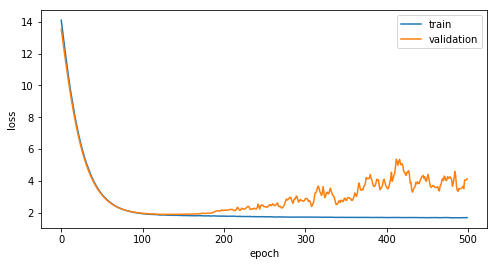

In [92]:
show_results(log)

In [93]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=100)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

408/408 [==============================] - 0s 66us/step
## evaluation loss and_metrics ##
[4.027809968181685, 0.06617647053345162]


In [94]:
y_test[0]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [95]:
model.predict(x_test[0].reshape(1,-1))

array([[0.15153995, 0.26090607, 0.19122751, 0.12951988, 0.00643398,
        0.26037264]], dtype=float32)

## 이미지를 CNN으로 분류

- RGB로 읽어옴

In [112]:
%%time
# img뽑아서 96*96으로 바꿔서 저장
class_img = {}
for k in class_dict.keys():
    img_list = []
    for img_path in os.listdir(class_dict[k]):
        if '.jpg' in img_path or '.png' in img_path:
            img = cv2.imread(os.path.join(class_dict[k], img_path))
            img = cv2.resize(img, (96,96))
            img_list.append(img)
    class_img[k] = img_list

Wall time: 12.2 s


- GRAY로 읽어옴

In [ ]:
%%time
# img뽑아서 96*96으로 바꿔서 저장
class_img = {}
for k in class_dict.keys():
    img_list = []
    for img_path in os.listdir(class_dict[k]):
        if '.jpg' in img_path or '.png' in img_path:
            img = cv2.imread(os.path.join(class_dict[k], img_path))
            img = cv2.resize(img, (96,96))
            img_list.append(img)
    class_img[k] = img_list

In [265]:
n1 = n1.reshape((-1,96,96,3))
n2 = n2.reshape((-1,96,96,3))

In [267]:
np.append(n1,n2, axis = 0).shape

(2, 96, 96, 3)

In [235]:
n1 = np.stack(n2)

In [268]:
%%time
np_images = np.zeros((1,96,96,3))
for k in class_img.keys():
    for np_img in class_img[k]:
        img_ = np_img.reshape((-1,96,96,3))
        np_images = np.append(np_images, img_, axis =0)

- np.save통해 위의 작업으로 나온 값을 저장

In [305]:
np.save('./np_images', np_images) # x_save.npy
#np_img = np.load('./np_images')

In [269]:
np_images.shape

(4681, 96, 96, 3)

In [283]:
np_images = np_images[1:]

In [284]:
np_images.shape

(4680, 96, 96, 3)

In [277]:
np_label = np.array(label_list)
np_label.shape

(4680,)

In [296]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np_images,np_label,test_size = 0.2, random_state = 42)

In [297]:
print("x_train.shape :{}\nx_val.shape : {}".format(x_train.shape, x_val.shape))
print("y_train.shape :{}\ny_val.shape : {}".format(y_train.shape, y_val.shape))

x_train.shape :(3744, 96, 96, 3)
x_val.shape : (936, 96, 96, 3)
y_train.shape :(3744,)
y_val.shape : (936,)


In [298]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 데이터 정규화
x_train_norm = x_train[:,:,:,:]
x_val_norm = x_val[:,:,:,:]
x_train_norm = x_train_norm.reshape([-1, 96*96])
x_val_norm = x_val_norm.reshape([-1,96*96])
print("x_train_norm.shape : {}".format(x_train_norm.shape))
print("x_val_norm,.shape : {}".format(x_val_norm.shape))

x_train_norm = scaler.fit_transform(x_train_norm)
x_val_norm = scaler.fit_transform(x_val_norm)
print("x_train_norm.mean : {}".format(x_train_norm.mean()))
print("x_train_norm.std : {}".format(x_train_norm.std()))


x_train_norm.shape : (11232, 9216)
x_val_norm,.shape : (2808, 9216)
x_train_norm.mean : 0.44823221894349713
x_train_norm.std : 0.30722785532900565


In [299]:
x_train_norm = x_train_norm.reshape([-1,96,96,3])
x_val_norm = x_val_norm.reshape([-1,96,96,3])
print("x_train_norm.shape : {}".format(x_train_norm.shape))
print("x_val_norm,.shape : {}".format(x_val_norm.shape))


x_train_norm.shape : (3744, 96, 96, 3)
x_val_norm,.shape : (936, 96, 96, 3)


In [303]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print("y_train.shape {}, y_val.shape : {}".format(y_train.shape, y_val.shape))

y_train.shape (3744, 6), y_val.shape : (936, 6)


## CNN MODEL 학습

In [308]:
from keras.layers import Activation
from keras.layers import MaxPooling2D

In [341]:
output_class = 6

model = Sequential()
model.add(Conv2D(24, (3,3), input_shape = (96,96,3),  use_bias = False, kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))

model.add(Conv2D(18, (2,2), use_bias = False,  kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(13, (2,2), use_bias = False,  kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(184,use_bias  = True, kernel_initializer = 'he_normal',bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256,use_bias  = True, kernel_initializer = 'he_normal',bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(128,use_bias  = True, kernel_initializer = 'he_normal',bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(48,use_bias  = True, kernel_initializer = 'he_normal',bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(output_class,use_bias  = True, kernel_initializer = 'he_normal',bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization(axis = -1))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [342]:
model.summary(), model.input, model.output

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 94, 94, 24)        648       
_________________________________________________________________
batch_normalization_119 (Bat (None, 94, 94, 24)        96        
_________________________________________________________________
activation_119 (Activation)  (None, 94, 94, 24)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 93, 93, 18)        1728      
_________________________________________________________________
batch_normalization_120 (Bat (None, 93, 93, 18)        72        
_________________________________________________________________
activation_120 (Activation)  (None, 93, 93, 18)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 46, 46, 18)        0         
__________

(None,
 <tf.Tensor 'conv2d_41_input:0' shape=(?, 96, 96, 3) dtype=float32>,
 <tf.Tensor 'activation_126/Softmax:0' shape=(?, 6) dtype=float32>)

In [ ]:
log = model.fit(x_train_norm, y_train, epochs = 10, batch_size = 5, validation_data= [x_val_norm,y_val])

Train on 3744 samples, validate on 936 samples
Epoch 1/10
3744/3744 [==============================] - 111s 30ms/step - loss: 13.7954 - acc: 0.2724 - val_loss: 10.1329 - val_acc: 0.3387
Epoch 2/10
3744/3744 [==============================] - 103s 27ms/step - loss: 8.6378 - acc: 0.4551 - val_loss: 6.7175 - val_acc: 0.4915
Epoch 3/10
3744/3744 [==============================] - 103s 28ms/step - loss: 6.3505 - acc: 0.5686 - val_loss: 5.3892 - val_acc: 0.7938
Epoch 4/10
3744/3744 [==============================] - 104s 28ms/step - loss: 4.9975 - acc: 0.6357 - val_loss: 4.1795 - val_acc: 0.8344
Epoch 5/10
3744/3744 [==============================] - 104s 28ms/step - loss: 4.7241 - acc: 0.6400 - val_loss: 5.3594 - val_acc: 0.8269
Epoch 6/10
3744/3744 [==============================] - 104s 28ms/step - loss: 5.1347 - acc: 0.6517 - val_loss: 4.6377 - val_acc: 0.8900
Epoch 7/10
3744/3744 [==============================] - 105s 28ms/step - loss: 5.0429 - acc: 0.6544 - val_loss: 4.0327 - val_acc:

In [314]:
def show_results(*logs):
    trn_loss, val_loss, trn_acc, val_acc = [],[],[],[]
    
    for log in logs:
        trn_loss += log.history['loss']
        val_loss += log.history['val_loss']
        
    fig, ax = plt.subplots(figsize = (8,4))
    # loss value
    ax.plot(trn_loss, label = 'train')
    # accuracy
    ax.plot(val_loss, label = 'validation')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend()

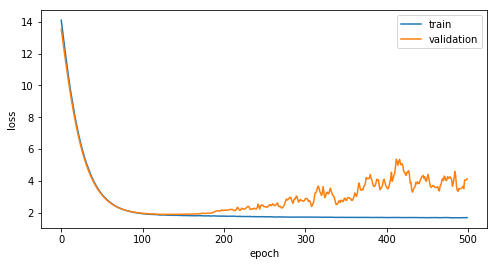

In [315]:
show_results(log)